##تعريف المكتبات 

In [37]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics


from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 

from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules

from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings

# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [38]:
BC = pd.read_csv('bc_97.csv')

In [39]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.4,10.0,20.0,10.0,...,3.4,4.60,13.4,196.0,14.0,150.0,145.0,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,NaN,9.3,11.0,17.0,...,4.4,5.00,12.5,155.0,NaN,260.0,139.2,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.5,8.5,13.0,10.0,...,5.1,4.46,13.8,312.0,NaN,169.0,140.0,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.2,8.0,7.0,13.0,...,3.1,4.33,10.7,212.0,10.0,138.0,136.4,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.0,NaN,9.0,15.0,...,4.2,4.13,12.3,243.0,5.0,154.0,NaN,4.00,106.2,0


In [40]:
BC.shape

(2435, 23)

<a id = "6"></a><br>
## Missing Values

In [41]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## outlires by Z-score


In [42]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [43]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [44]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [45]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [46]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          32
Urea         11
Creatinin    30
ALB           4
TCa          27
GPT           4
GOT           5
ALP          32
CA15          1
CEA           1
WBC           0
RBC          11
HGB           0
PLT           0
ESR          58
LDH          18
Na           13
K             7
CL           64
CLASS         0
dtype: int64

In [47]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


# LabelEncoder for object featurs

In [48]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])

In [49]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,19,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,19,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,17,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,17,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,19,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,19,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,19,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## بناء النموذج

##  تقسيم البيانات

In [50]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score,confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [51]:
# Define X as features and y as lablels

X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# set a seed and a test size for splitting the dataset 

test_size = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,stratify=y, random_state = 101)

In [52]:
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

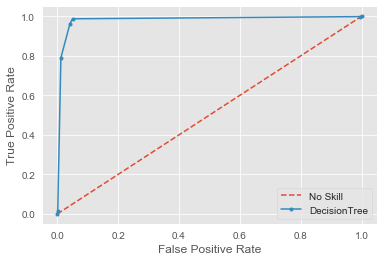

In [53]:
from matplotlib import pyplot


# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='DecisionTree')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

Best Threshold=0.631579, G-Mean=0.968


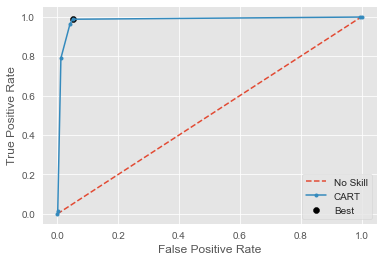

In [54]:
from numpy import sqrt
from numpy import argmax

# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='CART')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

In [55]:

# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

# generate dataset
# Define X as features and y as lablels
X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# split into train/test sets
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,stratify=y, random_state = 101)

# fit a model
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
DT.fit(X_train, y_train)

# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.631579


The precision score is: 0.94
The recall score is: 0.99 

Accuracy score is: 0.97
The F1 score is: 0.96


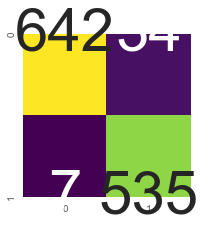

In [56]:
#Discrimination threshold = 0.631579
discrimination_threshold = 0.6
predictions = DT.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 60}, fmt="d", cmap="viridis", cbar=False)
plt.show()

In [58]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

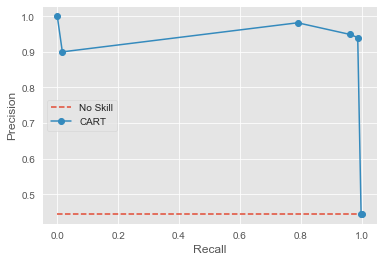

In [62]:

# pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# generate dataset
# Define X as features and y as lablels
X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# split into train/test sets
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,stratify=y, random_state = 101)

# fit a model
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
DT.fit(X_train, y_train)

# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='o', label='CART')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.631579, F-Score=0.963


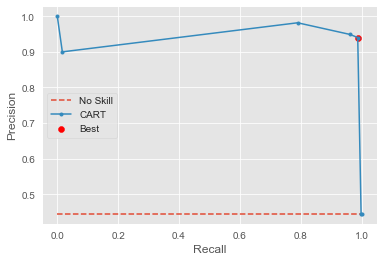

In [64]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# generate dataset
# Define X as features and y as lablels
X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# split into train/test sets
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,stratify=y, random_state = 101)

# fit a model
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
DT.fit(X_train, y_train)

# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='CART')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='r', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [65]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# generate dataset
# Define X as features and y as lablels
X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# split into train/test sets
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,stratify=y, random_state = 101)

# fit a model
DT=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
DT.fit(X_train, y_train)

# predict probabilities
yhat = DT.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))# search thresholds for imbalanced classification


Threshold=0.010, F-Score=0.96310


The precision score is: 0.94
The recall score is: 0.99 

Accuracy score is: 0.97
The F1 score is: 0.96


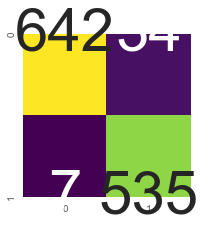

In [66]:
#Discrimination threshold = 0.010
discrimination_threshold = 0.010
predictions = DT.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The precision score is: %.2f" % precision_score( y_test, predictions))
print("The recall score is: %.2f" % recall_score( y_test, predictions), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 60}, fmt="d", cmap="viridis", cbar=False)
plt.show()